In [1]:
from utils.rotation_utils import *
from utils.traj_utils import *
import matplotlib.pyplot as plt

In [19]:
Xlist = []
for i in range(8):
    Xlist.append(np.concatenate([(0,0,i), list(reversed(Rot2zyx(Rot_zyx(np.pi/4*i, np.pi/4*i, np.pi/4*i))))]))

In [20]:
se3_alg = Combined([Euclidean(3), RotationUVW()])
DT = 0.02
DT_C = 0.001

In [21]:
Y0, Y1, Y2 = se3_alg.diff_in_alg(Xlist[0], Xlist[:3])
a, b, v0, q0 = calc_cubic_coeffs(DT, np.zeros_like(Y0), Y0, Y1, Y2)

In [22]:
tlist = []
dYlist = []
for t in np.arange(0, DT+DT_C, 0.001):
    dY = calc_cubic_traj(t, a, b, v0, q0)
    tlist.append(t)
    dYlist.append(dY)
Xo_list=se3_alg.add_from_alg(Xlist[0], dYlist)

In [23]:
v1 = calc_cubic_vel(DT, a, b, v0)
# v1 = se3_alg.diff_in_alg(Xlist[1], se3_alg.add_from_alg(Xlist[0], [v1]))[0]

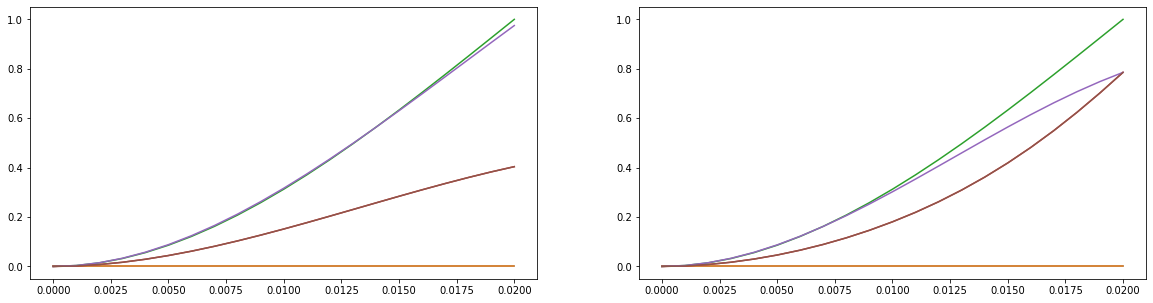

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(tlist, dYlist)
plt.subplot(1,2,2)
plt.plot(tlist, Xo_list)

In [25]:
Y0, Y1, Y2 = se3_alg.diff_in_alg(Xlist[1], Xlist[1:4])
a, b, v0, q0 = calc_cubic_coeffs(DT, v1, Y0, Y1, Y2)

In [26]:
tlist = []
dYlist = []
for t in np.arange(0, DT+DT_C, 0.001):
    dY = calc_cubic_traj(t, a, b, v0, q0)
    tlist.append(t)
    dYlist.append(dY)
Xo_list2=se3_alg.add_from_alg(Xlist[1], dYlist)

In [27]:
v1=calc_cubic_vel(DT, a, b, v0)

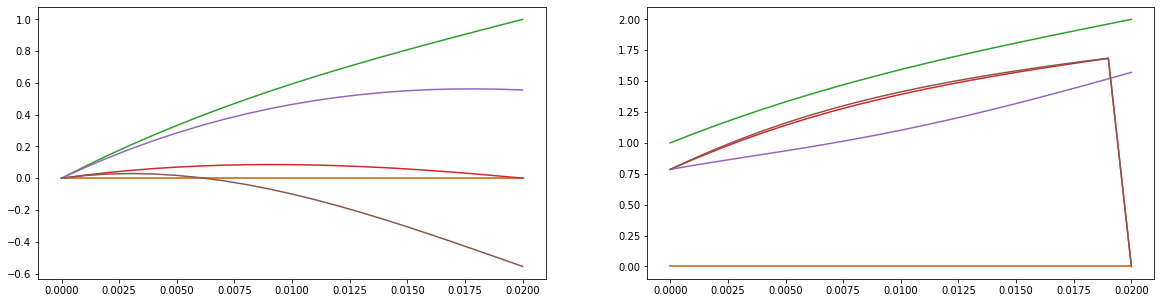

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(tlist, dYlist)
plt.subplot(1,2,2)
plt.plot(tlist, Xo_list2)

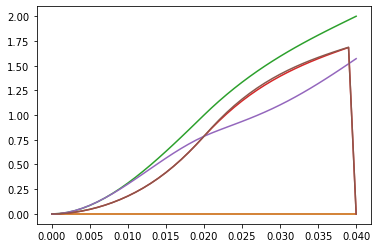

In [29]:
plt.plot(np.arange(0, DT*2+DT_C, 0.001), np.concatenate([Xo_list[:-1], Xo_list2]))

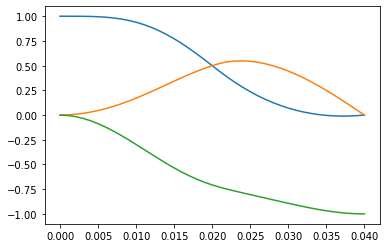

In [36]:
Xo_all = np.concatenate([Xo_list[:-1], Xo_list2])
plt.plot(np.arange(0, DT*2+DT_C, 0.001), [Rot_zyx(*list(reversed(X[3:])))[:,0] for X in Xo_all])

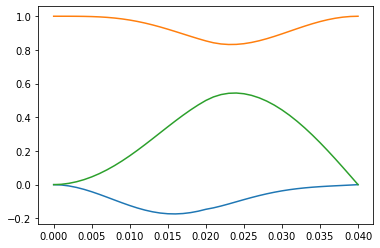

In [37]:
Xo_all = np.concatenate([Xo_list[:-1], Xo_list2])
plt.plot(np.arange(0, DT*2+DT_C, 0.001), [Rot_zyx(*list(reversed(X[3:])))[:,1] for X in Xo_all])

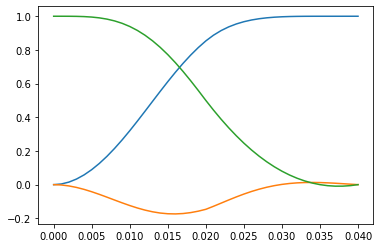

In [38]:
Xo_all = np.concatenate([Xo_list[:-1], Xo_list2])
plt.plot(np.arange(0, DT*2+DT_C, 0.001), [Rot_zyx(*list(reversed(X[3:])))[:,2] for X in Xo_all])